In [1]:
import numpy as np
import sarpy as sp

data = sp.datasets.load_nist()
len(data['bitmaps'])

6200

## Função que cria uma imagem sintética dado um dataset

test_image(*data, n, size*):

**Input**:
- **data** : Dataset a ser utilizado
- **n** : Quantidade de elementos para ser colocado na imagem final
- **size** *(opt)* : Tamanho da imagem final. *default=(1000,1000)*
- **seed** *(opt)* : Seed para a permutação e os locais da imagem. *default=None*

**Output**:
- **img** : Imagem final

A função faz uma permutação do *data* recebido e cria uma imagem com as *n* primeiras 
imagens dessa permutação em posições aleatórias.


In [2]:
def test_image(data, n, size=(1000,1000), seed=None):
    np.random.seed(seed)
    rand_samp = np.random.permutation(data['bitmaps'])
    img = np.zeros(size)
    for i in range(n):
        h,w = rand_samp[i].shape
        x = np.random.randint(size[0] - w)
        y = np.random.randint(size[1] - h)
        img[x:x+w, y:y+h] = np.logical_or(img[x:x+w, y:y+h],rand_samp[i])
    return img

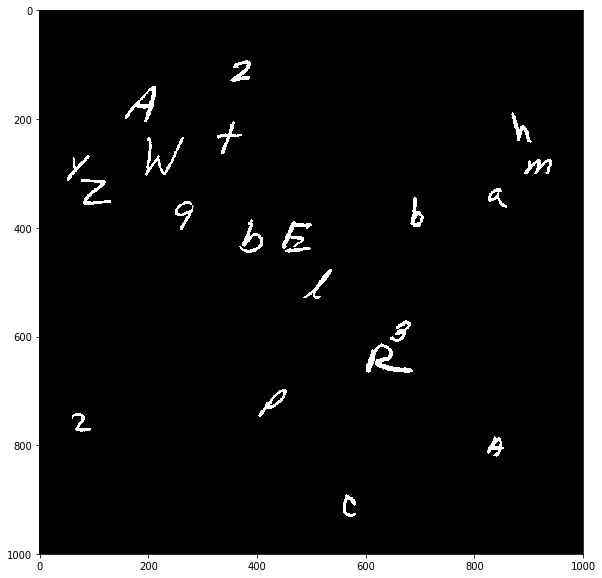

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,10]
img = test_image(data, 20)
plt.imshow(img, cmap='gray')
plt.show()